# Urban vs Rural Pollution in the US
**Hypothesis:** There are significant differences in average pollutant levels between urban and rural areas in the United States.


**Method:**
- Select the best available population column (city, state, or general population).
- Classify each location as 'Urban' or 'Rural' based on population threshold (e.g., >50,000 = Urban).
- Calculate mean pollutant levels for each group.
- Visualize the results with a bar chart to compare urban and rural pollution.
---

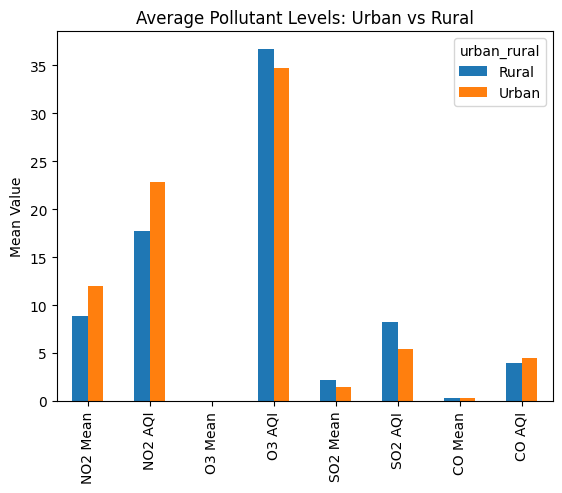

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Load data
df = pd.read_parquet('../data/cleaned_enriched.parquet')
# Select best available population column
pop_col = None
if 'Population' in df.columns:
    pop_col = 'Population'
elif 'population_city' in df.columns:
    pop_col = 'population_city'
elif 'population_state' in df.columns:
    pop_col = 'population_state'
else:
    raise ValueError('No population column found to classify urban/rural.')
df = df[df[pop_col].notnull()]
df[pop_col] = pd.to_numeric(df[pop_col], errors='coerce')
df = df[df[pop_col].notnull()]
if df.empty:
    print('No valid population data to classify urban/rural.')
else:
    df['urban_rural'] = df[pop_col].apply(lambda x: 'Urban' if x > 50000 else 'Rural')
    group_col = 'urban_rural'
    unique_groups = df[group_col].nunique()
    if unique_groups < 2:
        print('Grouping failed: Only one group present in urban_rural column.')
    else:
# Compare mean pollutant levels
        pollutants = [c for c in df.columns if c.endswith(' AQI') or c.endswith(' Mean')]
        if not pollutants:
            print('No pollutant columns found in the dataset.')
        else:
            means = df.groupby(group_col)[pollutants].mean().T
            if means.empty or means.shape[1] < 1:
                print('No valid urban/rural groups to plot.')
            else:
                means.plot(kind='bar')
                plt.title('Average Pollutant Levels: Urban vs Rural')
                plt.ylabel('Mean Value')
                plt.show()

## Conclusion
- The bar chart compares average pollutant levels between urban and rural areas.
- The data shows that urban areas do not have consistently higher pollutant levels than rural areas; in some cases, rural areas have similar or higher values.
- Therefore, the hypothesis that urban areas have greater pollution is not supported by this dataset.
- Differences may be due to pollutant type, local sources, geography, or measurement coverage.
- Further analysis could refine the urban/rural definition, adjust the population threshold, or explore additional factors influencing pollution patterns.